In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

    In this question, you will implement the Minimum Spanning Tree(MST) approach to cluster the Iris Dataset using only the sepal length and sepal width features. Your task is to write a python program that performs the following steps:

    1. Load the iris dataset.

In [2]:
# load iris dataset from the iris.csv file

iris_data = pd.read_csv(
    "/home/girikk/Files/LABS/PatRecog_MachLearn/assets/datasets/iris.csv"
)

# convert the categorical attribute, Species, to numerical one

species_remap_dict = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
iris_data = iris_data.replace({"Species": species_remap_dict})

In [3]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


    2. Extract the sepal length and sepal width columns.

In [4]:
# extract the columns required for clustering

req_data = iris_data[['SepalLengthCm', 'SepalWidthCm']]

In [5]:
req_data

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

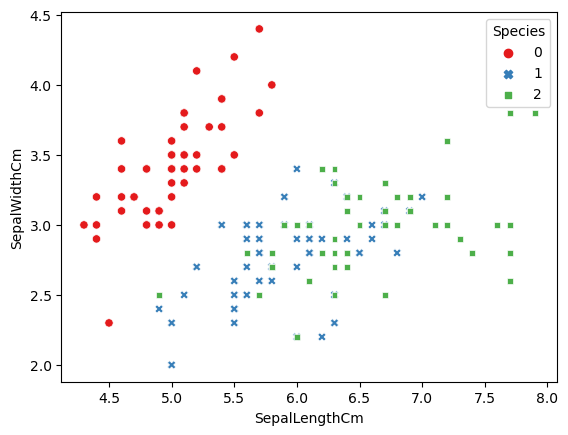

In [6]:
# a scatterplot of sepelLength and sepalWidth along with their species

sns.scatterplot(
    data=iris_data,
    x="SepalLengthCm",
    y="SepalWidthCm",
    hue="Species",
    style="Species",
    palette="Set1",
)

    3. Calculate the pairwise Euclidean distances between data points using the selected features.

In [7]:
# the euclidean distance function, calculates euclidean distance between two numpy ndarrays

def euclidean_distance(point_1: np.ndarray, point_2: np.ndarray):
    """
        Calculates the euclidean distance between two numpy arrays and returns a float
    """
    sum_squares = 0
    for i in range(len(point_1)):
        sum_squares += (point_1[i] - point_2[i]) ** 2
    return sum_squares ** (1 / 2)

In [8]:
# the distance_to_all function calculates euclidean distance between a numpy ndarray and all the records in a pandas dataframe

def distance_to_all(dataset: pd.DataFrame, point: np.ndarray) -> list:
    """
        Utilises the euclidean distance function to calculate the distance between a selected point
        and all points of a pandas dataframe.
    """
    distance_array = []
    for i in range(len(dataset)):
        row = dataset.iloc[i]
        second_point = row.to_numpy()
        distance_array.append(euclidean_distance(point, second_point))
    return distance_array

In [9]:
# create an array of zeros for storing distances between each pair of points

euclidean_distances = pd.DataFrame(0, index=np.arange(150), columns=np.arange(150), dtype=float)
euclidean_distances

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# for each sample of req_data set, compute its euclidean distance with every sample of req_data set

for i in range(len(req_data)):
    """
        Utilise the distance to all function to calculate pairwise euclidean distances between
        all points of the req_data
    """
    sample = req_data.iloc[i].to_numpy()
    for j, dist in enumerate(distance_to_all(req_data, sample)):
        euclidean_distances[i][j] = dist

In [11]:
euclidean_distances

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.538516,0.500000,0.640312,0.141421,0.500000,0.509902,0.141421,0.921954,0.447214,...,1.649242,1.843909,1.063015,1.726268,1.612452,1.676305,1.562050,1.486607,1.104536,0.943398
1,0.538516,0.000000,0.282843,0.316228,0.608276,1.029563,0.500000,0.412311,0.509902,0.100000,...,1.802776,2.002498,0.948683,1.910497,1.824829,1.800000,1.486607,1.600000,1.360147,1.000000
2,0.500000,0.282843,0.000000,0.141421,0.500000,0.989949,0.223607,0.360555,0.424264,0.223607,...,2.002498,2.202272,1.208305,2.100000,2.002498,2.009975,1.746425,1.811077,1.513275,1.216553
3,0.640312,0.316228,0.141421,0.000000,0.640312,1.131371,0.300000,0.500000,0.282843,0.300000,...,2.100000,2.300000,1.264911,2.202272,2.109502,2.102380,1.802776,1.902630,1.627882,1.303840
4,0.141421,0.608276,0.500000,0.640312,0.000000,0.500000,0.447214,0.200000,0.921954,0.509902,...,1.772005,1.964688,1.204159,1.843909,1.726268,1.802776,1.702939,1.615549,1.216553,1.081665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.676305,1.800000,2.009975,2.102380,1.802776,1.581139,2.137756,1.746425,2.302173,1.802776,...,0.100000,0.223607,0.948683,0.223607,0.300000,0.000000,0.640312,0.200000,0.640312,0.800000
146,1.562050,1.486607,1.746425,1.802776,1.702939,1.664332,1.923538,1.581139,1.941649,1.523155,...,0.721110,0.848528,0.538516,0.860233,0.894427,0.640312,0.000000,0.538516,0.905539,0.640312
147,1.486607,1.600000,1.811077,1.902630,1.615549,1.421267,1.941649,1.552417,2.102380,1.603122,...,0.223607,0.412311,0.761577,0.360555,0.360555,0.200000,0.538516,0.000000,0.500000,0.600000
148,1.104536,1.360147,1.513275,1.627882,1.216553,0.943398,1.600000,1.200000,1.868154,1.334166,...,0.583095,0.761577,0.806226,0.632456,0.509902,0.640312,0.905539,0.500000,0.000000,0.500000


    4. Build the minimum spanning tree using prim's algorithm.

In [12]:
# Prim's Algorithm for generating the MST of all 150 nodes along with their edges

import sys
 
 
class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def returnMST(self, parent):
        tup = []
        for i in range(1, self.V):
            tup.append((tuple(req_data.iloc[parent[i]]), tuple(req_data.iloc[i]), self.graph[i][parent[i]]))
        return tup
 
    def minKey(self, key, mstSet):
 
        # Initialize min value
        min = sys.maxsize
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    # Function to construct and print MST for a graph
    # represented using adjacency matrix representation
    def primMST(self):
 
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V  # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1  # First node is always the root of
 
        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
 
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False \
                and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
 
        return self.returnMST(parent)
 
 
if __name__ == '__main__':
    g = Graph(150)
    g.graph = euclidean_distances.to_numpy().tolist()
 
    tup = g.primMST()

    5. Identify the two longest edges in MST and remove them to create three clusters.

In [13]:
# sort the edges in ascending order based on their weights

tup.sort(key=lambda x: x[2])
print(f"Longest edges are {tup[-1]} and {tup[-2]}")
print("[Syntax is pt1, pt2, distance]")

Longest edges are ((7.2, 3.6), (7.7, 3.8), 0.5385164807134504) and ((4.9, 2.4), (4.5, 2.3), 0.4123105625617664)
Syntax is pt1, pt2, distance


    6. Visualize the minimum spanning tree with identified clusters.

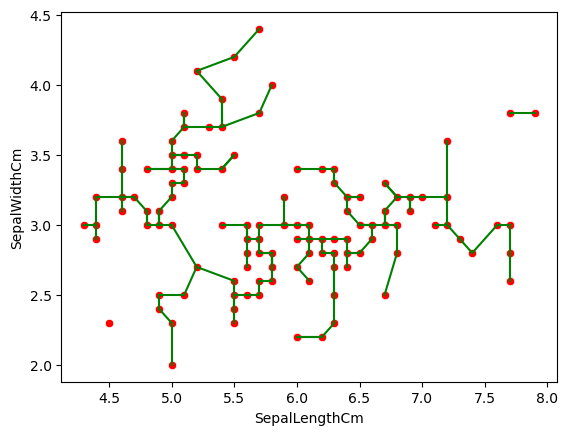

In [17]:
# Plot the points along with the MST formed, each disconnected component of the formed graph will be a cluster of its own

# scatter the points on the grid
def plot(n: int):
    """
        plot all the edges minus the n edges mentioned which will be removed from the MST to form clusters
    """
    
    sns.scatterplot(
        data=req_data,
        x="SepalLengthCm",
        y="SepalWidthCm",
        color='r'
    )
    
    for i in range(len(tup)-n):
        # this is based on the output produces by the prim's algorithm
        x, y = [tup[i][0][0], tup[i][1][0]], [tup[i][0][1], tup[i][1][1]]
        plt.plot(x, y, color="g")
        
    plt.show()

plot(2)

    You will notice that clusters have not been detected appropriately here because the class outliers have greater edge distances.
    If you take n as 4, you will notice that species 0 gets clustered out nicely!!

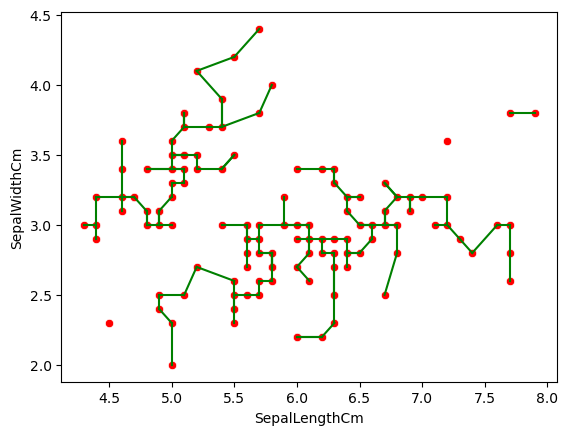

In [20]:
plot(4)

    However, species 1 and species 2 cannot be clustered based only on the two features sepalLength and sepalWidth because they are interspersed with each other.
    We need more features to properly cluster them.